In this research, I'll look at the UCI Machine Learning Repository's Iris dataset.

 "UCI Machine Learning Repository: Iris Data Set".https://archive.ics.uci.edu/ml/datasets/iris
 
Data exploration:
some of the dataset's characteristics:
* 150 samples with four characteristics (same units, all numeric)
* Balanced class distribution (50 samples for each class)
* There are no gaps in the data.

Data preparation:Train-Test split
using train_test_split from sklearn.model_selection: Choosing 40% from the dataset as test set to ensure that there are enough data points to test the model's performance. Examine the relationship between variables in the dataset.

Evaluate Two Algorithms: 
Decision tree classifier  and Linear Discriminant Analysis (LDA).


 # Data Exploration  

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Read data from url 

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset = pd.read_csv(url, names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
type(dataset)

pandas.core.frame.DataFrame

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Columns types 

In [4]:
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

### Generate descriptive statistics

In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check the class distribution:

In [6]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Each class has <b> the same number </b>  of instances

### another way of exploring the data is by using sklearn librery as shown here: 

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris_skllearnDataset=load_iris()
print(iris_skllearnDataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

As I previously demonstrated, we can view the number of instances, three classes with the same number of instances, attribute information, class names, summary statistics for each of the elements, and whether any of these values contain missing attribute data. There is no missing data in this dataset.

## Train-Test split

As a general guideline, the test set should include 20–30% of the dataset. Because this dataset is small, I chose 40% to ensure that there are enough data points to test the model's performance. To perform the Train-Test split i will use sklearn.model_selection.train_test_split as described here:

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
*arrays   - sequence of indexables with <b> same length </b>
test_size - 0.4 represent the proportion of the dataset to include in the test split



In [9]:
train, test = train_test_split(dataset, test_size = 0.4, stratify = dataset['class'], random_state = 42)

In [10]:
train.shape

(90, 5)

In [11]:
test.shape

(60, 5)

we can see that the test set includes 60 instances and the the train dataset includes 90 .

In [12]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,class
130,7.4,2.8,6.1,1.9,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa


In [13]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,class
40,5.0,3.5,1.3,0.3,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica


### Histograms 
Histograms of the different properties to evaluate the dataset

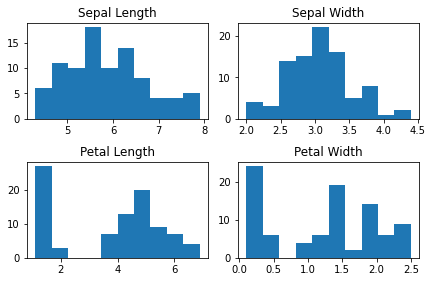

In [14]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

The gap in the histograms suggests that the data may be divided into several subgroups.
In order to see the relationship between a numerical and one or more categorical variables i will use seaborn.catplot.

### evaluate the relationship between numerical and categorical variables

#### using boxplot of seaborn.catplot library

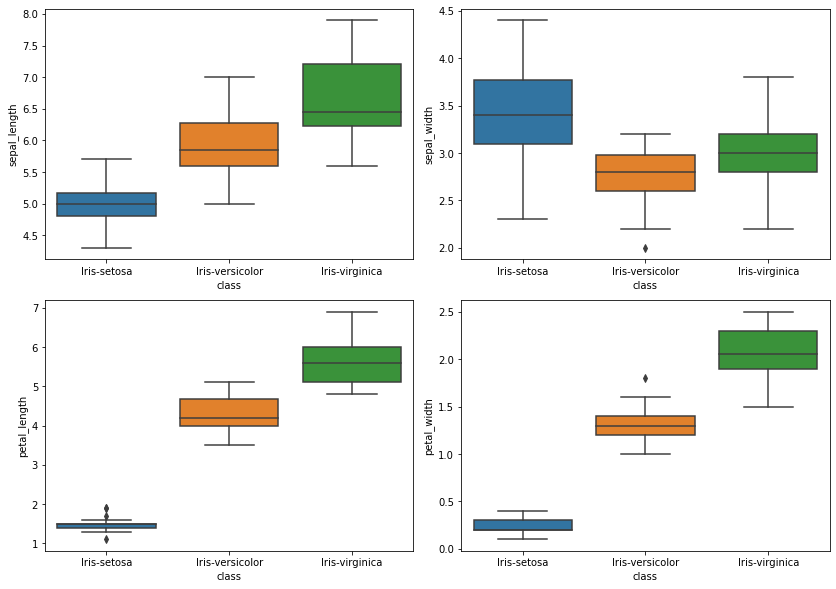

In [15]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(11.7, 8.27)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'class', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'class', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'class', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'class', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

from the graphs we can see:
* petal's graphs:one of the subgroups we viewed earlier is Setosas. The subgroup's petal measurements are the smallest and less spread-out than the other subgroups.
* The subgroup Versivolor has lower values than the Virginica on averege in all the parameters.
               

#### using violinplot of seaborn.catplot library
Violin plot is another type of visualization, which combines the benefit of both histogram and box plot:

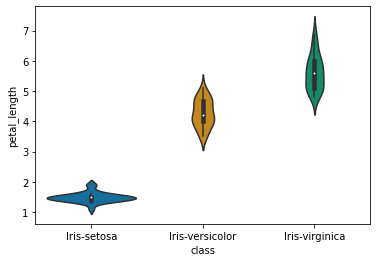

In [16]:
sns.violinplot(x="class", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

### Plot pairwise relationships
Plot pairwise relationships in a dataset with seaborn.pairplot
Assigning a **hue variable** adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)


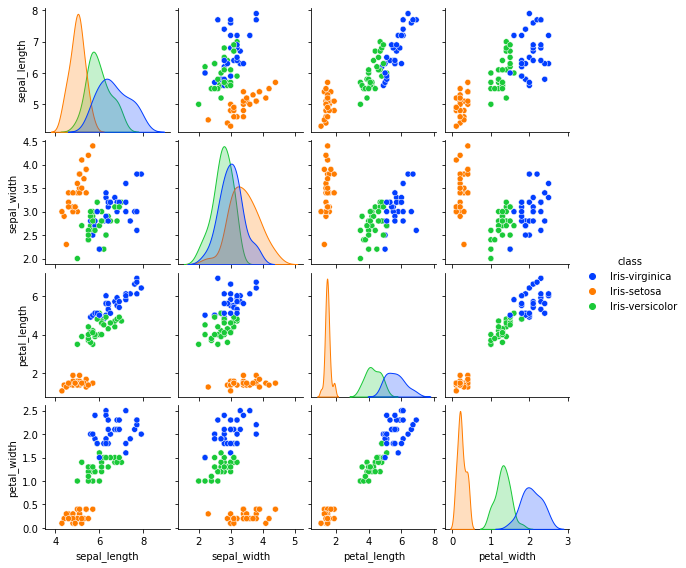

In [17]:
sns.pairplot(train, hue="class", height = 2, palette = 'bright');

We can see that the variables petal length and petal width are highly correlated. Furthermore, petal measurements distinguish between species better than sepal measurements.

### examine the relationship between variables
We can use a correlation matrix to investigate the relationship between variables quantitatively.

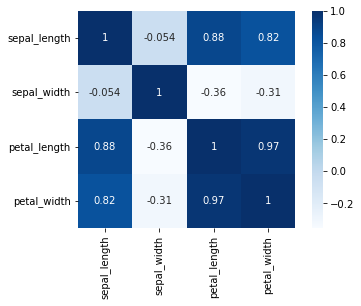

In [18]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True, cmap="Blues");

The primary conclusion from the correlation matrix is that the petal measures are significantly associated, whereas the sepal measurements are uncorrelated. The petal features shows a strong relationship with sepal length, but not with sepal width.

# Build Classifiers

#### Seperating the class label and features

In [19]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train['class']
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test['class']

##  Decision tree classifier

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.
("Decision Tree Classification in Python Tutorial".https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

Implementation: I use the DecisionTreeClassifier from the sklearn.tree library to create a decision tree with a maximum depth of three, as shown below:

### algorithem prediction accuracy

In [20]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


The algorithem prediction accuracy of the test data is 98.3%. 

### Importance of each predictor
with this model we can see the importance of each predictor through its feature_importances_ attribute:
    
    Note: Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [21]:
print(dict(zip(train.columns, mod_dt.feature_importances_)))

{'sepal_length': 0.0, 'sepal_width': 0.0, 'petal_length': 0.42430866337273976, 'petal_width': 0.5756913366272602}


The first two features (sepal measurements) are of no importance, and only the petal measurements are utilized to form this tree.

### decision tree classifier visualization
plotting the tree with the plot_tree function:

    Note: I’m using filled=True in the plot_tree. When this parameter is set to True the method uses color to indicate the majority of the class

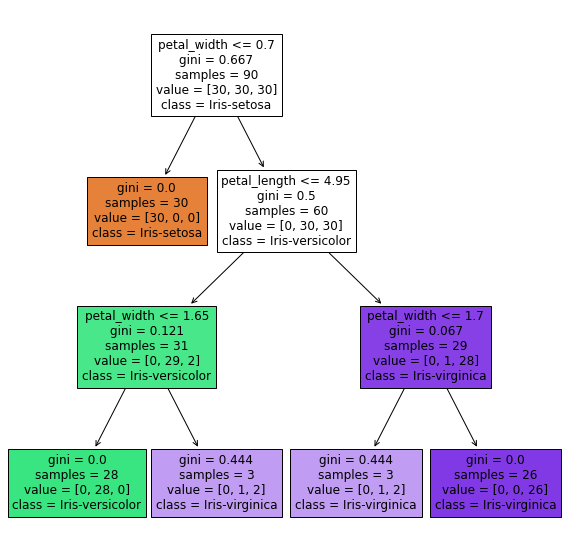

In [22]:
plt.figure(figsize = (10,10))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

Apart from each rule (e.g. the first criterion is petal_width ≤ 0.7), we can also see the Gini index (impurity measure) at each split, assigned class, etc. Note that all terminal nodes are pure besides the two “light purple” boxes at the bottom. We can less confident regarding instances in those two categories.

To demonstrate how simple it is to classify new data points, let's say a new instance has a petal length of 4.5cm and a petal width of 1.5cm. Using the criteria, we can anticipate that it is versicolor.

##  Decision boundary for pedal width vs pedal length

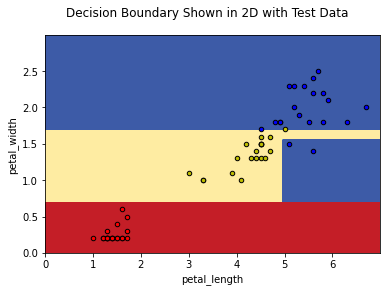

In [23]:
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors].values,y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(
                X_test.iloc[idx, 2], 
                X_test.iloc[idx, 3], 
                c=color, 
                label=y_test, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', 
                s=20
                )

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

Only 59 of the 60 data points are classified correctly.

### confusion matrix one versicolor misclassified

C:\Users\lital\anaconda\envs\computer_vision\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


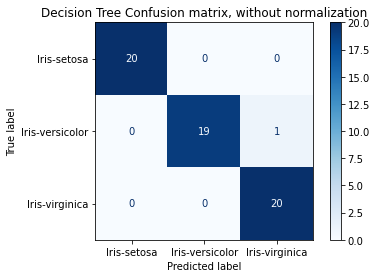

In [24]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

We can observe from the confusion matrix that there is one misclassified data point: versicolor, which we predictes as virginica.

## Linear Discriminant Analysis (LDA)

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. ("sklearn.discriminant_analysis.LinearDiscriminantAnalysis".https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

Implementation: I use the LinearDiscriminantAnalysis from the sklearn.discriminant_analysis library to create a decision Linear Discriminant Analysis, as shown below:

### examine the test accuracy using all features and only petal features:

#### LDA Classifier

In [25]:
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


#### LDA Classifier with two predictors

In [26]:
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier with two predictors on test data is 0.933


Using all features boosts the test accuracy of our LDA model.
To visualize the decision boundary in 2D, we can use our LDA model with only petals and also plot the test data:

#### plot LDA with 2 predictors

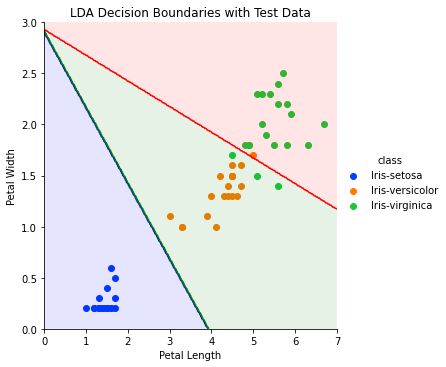

In [27]:
mod_lda_1 = LinearDiscriminantAnalysis()
y_pred = mod_lda_1.fit(X_train[selected_predictors].values, y_train_en).predict(X_test[selected_predictors].values)

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="class", height=5, palette = 'bright').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_lda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA Decision Boundaries with Test Data');

The graph shows that four test points are incorrectly classified: three virginica and one versicolor. Furthermore, the graph simply shows the group's borders. By projecting a new data point to this graph, we can easily anticipate where it will be categorized.